# Predicting Airline Passenger Satisfation with help of ML

## Steps

1. Defining Problem
2. Briefing about Data
3. Importing Data
4. Data Exploration
5. Data Summarisation
6. Modelling
7. Experimentation & Evaluation
8. Conclusion & References

# 1. Defining Problem

The satisfaction of passengers is crucial for airlines, which aim at maintaining competitiveness, reducing costs, enhancing customer loyalty and providing an exceptional travel experience. This is allowing airlines to make data based decisions, prevent problems and keep up with changing customer preferences in order to contribute positively for the long term success of the industry. So to meet this condition we have to predict the satisfaction of passengers.Understanding and predicting passenger satisfaction is pivotal in the fiercely competitive airline industry, ensuring airlines stay responsive to evolving passenger preferences and maintain a reputation for exceptional service.

Given the airline passenger satisfaction survey information about the passengers, can we predict whether they are satisfies or not with the airline services ? Also what factors are highly correlated to a satisfied (or dissatisfied) passenger?

# 2. Data

### 2.1 Data contains: 

We have two files for Ariline Customer satisfaction
1. `train.csv` 
2. `test.csv`.

The datasets contains 23 different attributes about an airline passenger satisfaction survey. All these attributes gives us useful information about the passengers and how they rated the diffferent services of the flights.

What factors lead to customer satisfaction for an Airline?

### 2.2 Data source: 

Dataset collected from Kaggle Datasets.

Link: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction 

### 2.3 Data is about: 

The datasets contains 23 different attributes which are -

1. Gender: Gender of the passengers 
2. Customer Type: The customer type as per loyality and behaviour
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers
5. Class: Travel class in the plane of the passengers
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level ( Prediction Target )



### 2.4 Evaluation Criteria:

If we can reach up to 95% accuracy at predicting whether or not a customer is satisfied with the airline services, then only we'll pursue for further application purpose.

1. Confusion Matrix
2. Classification Report
3. ROC Curve and AUC Value
4. Cross Validated Scores

### 2.5 Extra :

Modules we are going to use : Pandas, Numpy, Plotly, Matplotlib, Seaborn, Jovian, Joblib, XGBoost, Scikit-Learn.

In [1]:
# !pip install pandas, numpy, plotly, matplotlib, seaborn, jovian, joblib, xgboost, scikit-learn --q

# 3. Importing Data

Import our basic required files and modules which need for Exploratory Data Analysis and going for Data Pre-processing.

In [88]:
# Importing the modules

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### 3.2 Importing Datasets

Read the train dataset. Print first 5 rows of dataset.

In [54]:
raw_df = pd.read_csv('train.csv')  # Loading the dataset

In [55]:
raw_df.head()  # Checking first 5 rows

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [56]:
#Getting 15000 random sample data to process
raw_df= raw_df.sample(n=15000)

In [57]:
raw_df.shape

(15000, 25)

In [58]:
#Print head of sleected data 
raw_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
77427,77427,109248,Female,Loyal Customer,10,Personal Travel,Eco,483,3,4,...,5,4,3,4,5,4,5,0,0.0,neutral or dissatisfied
7510,7510,88321,Male,Loyal Customer,35,Business travel,Business,2938,1,1,...,4,4,4,4,4,4,3,0,0.0,satisfied
19585,19585,96754,Female,Loyal Customer,59,Business travel,Business,2163,3,1,...,5,5,5,5,5,5,3,6,0.0,satisfied
69780,69780,105903,Female,Loyal Customer,39,Business travel,Business,3480,3,3,...,5,5,5,5,3,5,3,0,0.0,satisfied
34846,34846,64942,Female,disloyal Customer,37,Business travel,Eco,469,2,1,...,3,4,1,3,4,4,3,0,0.0,neutral or dissatisfied


In [59]:
#Print tail of the data
raw_df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
45093,45093,80411,Female,Loyal Customer,34,Business travel,Business,2248,3,3,...,4,4,4,4,5,4,4,0,1.0,satisfied
8304,8304,76266,Male,Loyal Customer,46,Business travel,Eco,1927,2,1,...,2,2,3,2,1,4,2,0,0.0,neutral or dissatisfied
23025,23025,39176,Female,disloyal Customer,26,Business travel,Eco,67,3,2,...,5,1,3,4,4,4,5,0,0.0,neutral or dissatisfied
63423,63423,11464,Male,Loyal Customer,59,Business travel,Eco Plus,201,2,1,...,1,1,3,4,1,3,1,0,0.0,neutral or dissatisfied
94472,94472,40182,Male,Loyal Customer,35,Business travel,Business,387,3,3,...,5,5,5,5,5,5,2,0,0.0,satisfied


# 4. Data Exploration

Finding out the insights and we can see how they are related to the target column. 

## 4.1 General Information about Dataset

- Dataset Shape
- Columns Information
- Missing values
- Statistical Information
- Unique Values

In [60]:
#Getting all datatypes
raw_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [61]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 77427 to 94472
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         15000 non-null  int64  
 1   id                                 15000 non-null  int64  
 2   Gender                             15000 non-null  object 
 3   Customer Type                      15000 non-null  object 
 4   Age                                15000 non-null  int64  
 5   Type of Travel                     15000 non-null  object 
 6   Class                              15000 non-null  object 
 7   Flight Distance                    15000 non-null  int64  
 8   Inflight wifi service              15000 non-null  int64  
 9   Departure/Arrival time convenient  15000 non-null  int64  
 10  Ease of Online booking             15000 non-null  int64  
 11  Gate location                      15000 non-null 

In [62]:
#Examine the dataset for null values 
raw_df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             44
satisfaction                          0


In [63]:
# Dropping the rows null data
raw_df.dropna(inplace=True)

In [64]:
#Get shape
raw_df.shape

(14956, 25)

In [65]:
raw_df.head().T 

,77427,7510,19585,69780,34846
Unnamed: 0,77427,7510,19585,69780,34846
id,109248,88321,96754,105903,64942
Gender,Female,Male,Female,Female,Female
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer
Age,10,35,59,39,37
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Business,Business,Eco
Flight Distance,483,2938,2163,3480,469
Inflight wifi service,3,1,3,3,2
Departure/Arrival time convenient,4,1,1,3,1


In [66]:
#Get information of dataset
raw_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000
mean,51797.375568,65430.397767,39.307703,1189.677521,2.739636,3.049545,2.757957,2.980075,3.208478,3.266181,3.451257,3.373362,3.390078,3.362129,3.633124,3.304493,3.643086,3.295333,14.843274,15.198449
std,30196.201509,37333.740170,15.245636,995.316486,1.323404,1.515644,1.391617,1.275494,1.329650,1.349501,1.318831,1.328019,1.283548,1.307866,1.181093,1.260710,1.170597,1.308576,41.169874,41.731377
min,1.000000,8.000000,7.000000,56.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,25163.250000,33623.750000,27.000000,416.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51693.500000,65519.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,78297.500000,97664.750000,51.000000,1741.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103901.000000,129871.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


Here we can see some basic statistical information about our passenges and their flight details:

1. The average age of the passengers is 39, where the minimum age being 7 and maximum 85.
2. The average flight travel distance  is 1189 miles, where the minimum age being 31 and maximum 4893.
3. The mean values for the customer input categories are either 2 or 3.  

## 4.2 Data analysis and Finding Patterns

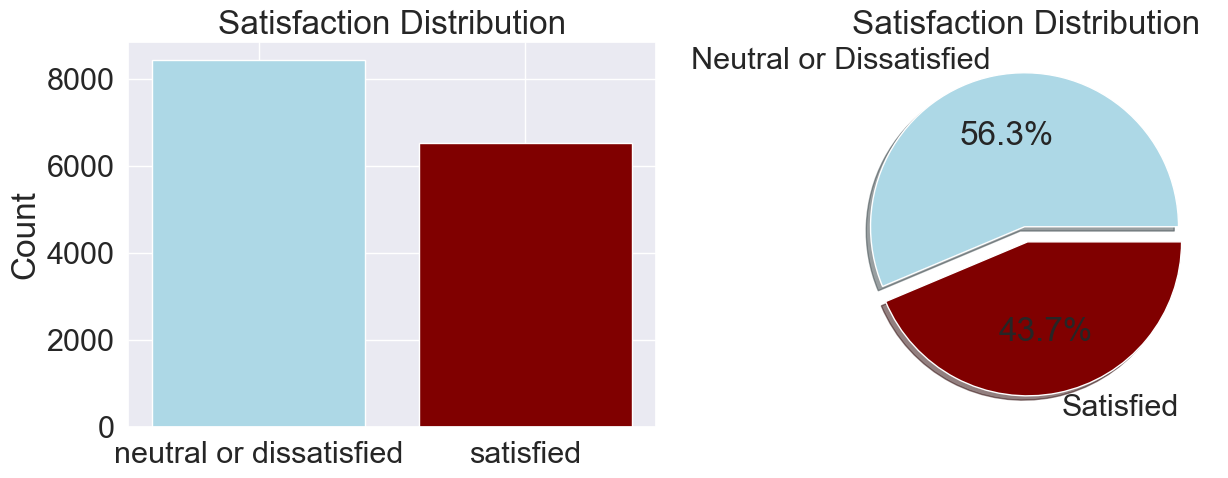

In [67]:
# Visualising the satisfation distribution among passengers
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(raw_df["satisfaction"].value_counts().index, raw_df["satisfaction"].value_counts(),color=["lightblue", "maroon"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(raw_df["satisfaction"].value_counts(),colors=["lightblue", "maroon"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

In [68]:
# Removing unwanted columns
raw_df = raw_df.drop(['id','Unnamed: 0', 'Customer Type', 'Gate location','Type of Travel',],axis=1)

In [69]:
#View count of cells with object data type
for x in raw_df.select_dtypes(include='object'):
    print(raw_df[x].value_counts())

Female    7512
Male      7444
Name: Gender, dtype: int64
Business    7217
Eco         6634
Eco Plus    1105
Name: Class, dtype: int64
neutral or dissatisfied    8426
satisfied                  6530
Name: satisfaction, dtype: int64


# 4.3 Encoding Categorical Data

In [103]:
# Categorizing some columns
refactored_values = {
    'Gender':{
        'Male' : 0,
        'Female':1
        
    },
    'satisfaction':{
        'neutral or dissatisfied': 0,
        'satisfied':1
        
    },
    'Class':{
        'Business':0,
        'Eco':1,
        'Eco Plus':2
    }
}

raw_df.replace(refactored_values, inplace=True)

In [104]:
#Rechecking the categorized Columns
raw_df.head()

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
77427,1,10,1,483,3,4,3,5,3,5,5,4,3,4,5,4,5,0,0.0,0
7510,0,35,0,2938,1,1,1,3,4,4,4,4,4,4,4,4,3,0,0.0,1
19585,1,59,0,2163,3,1,3,2,4,4,5,5,5,5,5,5,3,6,0.0,1
69780,1,39,0,3480,3,3,3,3,5,5,5,5,5,5,3,5,3,0,0.0,1
34846,1,37,1,469,2,1,2,3,2,3,3,4,1,3,4,4,3,0,0.0,0


# 4.4  Visualizing Data

In [105]:
# Getting the distribution of Age, Class, Seat Comfort, ease of Online booking, On-board services, Cleanliness 
sns.set_style('darkgrid')

# Creating a 3X2 subplots 
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(150,100))

sns.histplot(ax=axs[0,0], data=raw_df, x='Age', kde=True)
sns.histplot(ax=axs[0,1], data=raw_df, x='Class', kde=True)
sns.histplot(ax=axs[1,0], data=raw_df, x='Seat comfort', kde=True)
sns.histplot(ax=axs[1,1], data=raw_df, x='Ease of Online booking', kde=True)
sns.histplot(ax=axs[2,0], data=raw_df, x='On-board service', kde=True)
sns.histplot(ax=axs[2,1], data=raw_df, x='Cleanliness', kde=True)

#Adding Titles
fig.suptitle('Histogram of Airlines Ratings', fontsize=120)

plt.tight_layout()
plt.show()

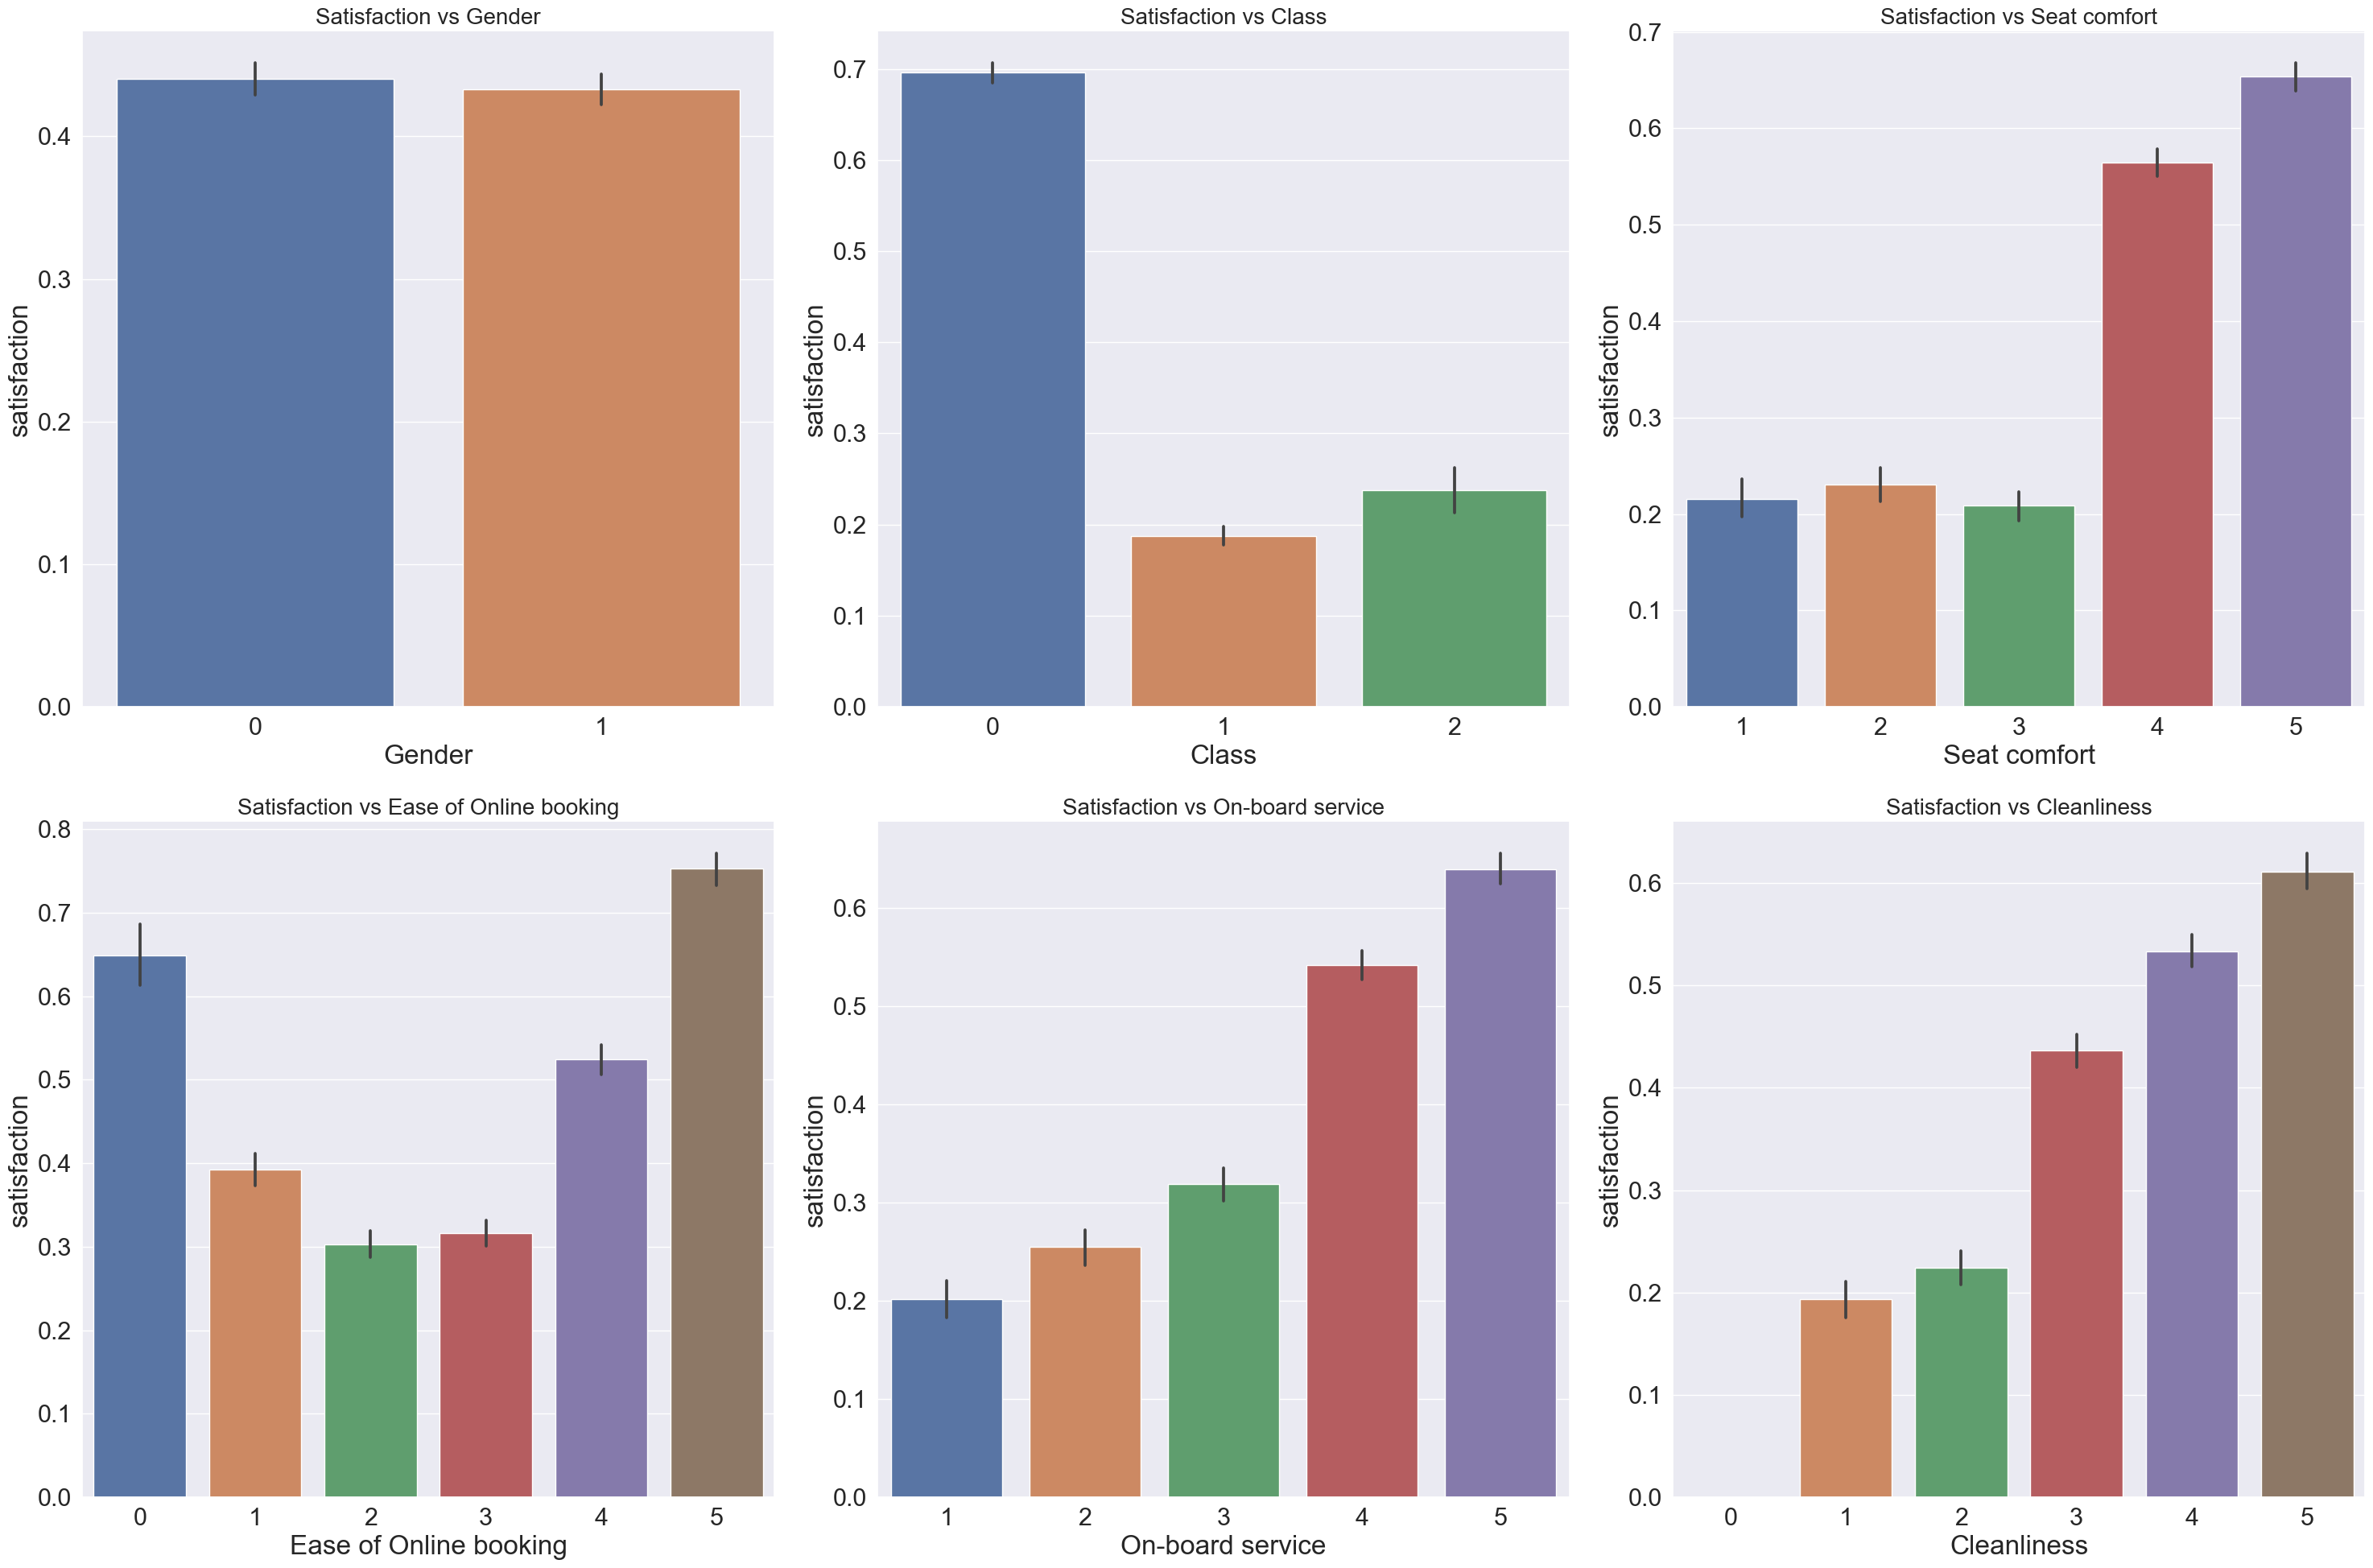

In [106]:

# Set the figure size and font scale
plt.figure(figsize=(30, 20))
sns.set(font_scale=2)

# Create subplots for each satisfaction factor
plt.subplot(231)
plt.title("Satisfaction vs Gender", fontsize=20)
sns.barplot(x='Gender', y='satisfaction', data=raw_df)

plt.subplot(232)
plt.title("Satisfaction vs Class", fontsize=20)
sns.barplot(x='Class', y='satisfaction', data=raw_df)

plt.subplot(233)
plt.title("Satisfaction vs Seat comfort", fontsize=20)
sns.barplot(x='Seat comfort', y='satisfaction', data=raw_df)

plt.subplot(234)
plt.title("Satisfaction vs Ease of Online booking", fontsize=20)
sns.barplot(x='Ease of Online booking', y='satisfaction', data=raw_df)

plt.subplot(235)
plt.title("Satisfaction vs On-board service", fontsize=20)
sns.barplot(x='On-board service', y='satisfaction', data=raw_df)

plt.subplot(236)
plt.title("Satisfaction vs Cleanliness", fontsize=20)
sns.barplot(x='Cleanliness', y='satisfaction', data=raw_df)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Age vs Satification

In [107]:
import plotly.express as px
px.histogram(raw_df, 
             x='Age', 
             title='Age vs Satisfaction Ratio',
             marginal='box',
             color='satisfaction')

# Satisfication vs Class

In [108]:
raw_df['Class'].value_counts()

0    7217
1    6634
2    1105
Name: Class, dtype: int64

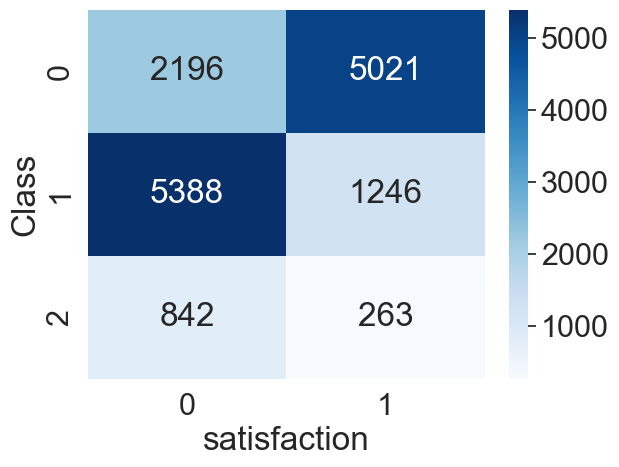

In [109]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(raw_df['Class'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [110]:
# Check the percentages

pd.crosstab(raw_df['Class'], raw_df['satisfaction'], normalize=True)*100

satisfaction,0,1
Class,,
0,14.683070,33.571811
1,36.025675,8.331105
2,5.629848,1.758492


* 50% passengers belong to Business Class, 50% belongs to Eco and Eco Plus Class.
* Majorlity of the customers belonging to Eco and Eco Plus are not satisfied with the services.
* However majority of the customers from Business Class are satisfied with the services.

In [111]:
customer_input_list = ['Inflight wifi service',
       'Departure/Arrival time convenient',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [112]:
def plot_func(a,b):
    for category in customer_input_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=raw_df[category],palette="Pastel1")

        plt.subplot(1,2,2)
        sns.countplot(x=raw_df[category],hue=raw_df['satisfaction'], palette='Blues')
        plt.show()

**6.1 For categories**

1. Inflight wifi service
2. Departure/Arrival time convenient
3. Gender
4. Online boarding
5. Food and drink

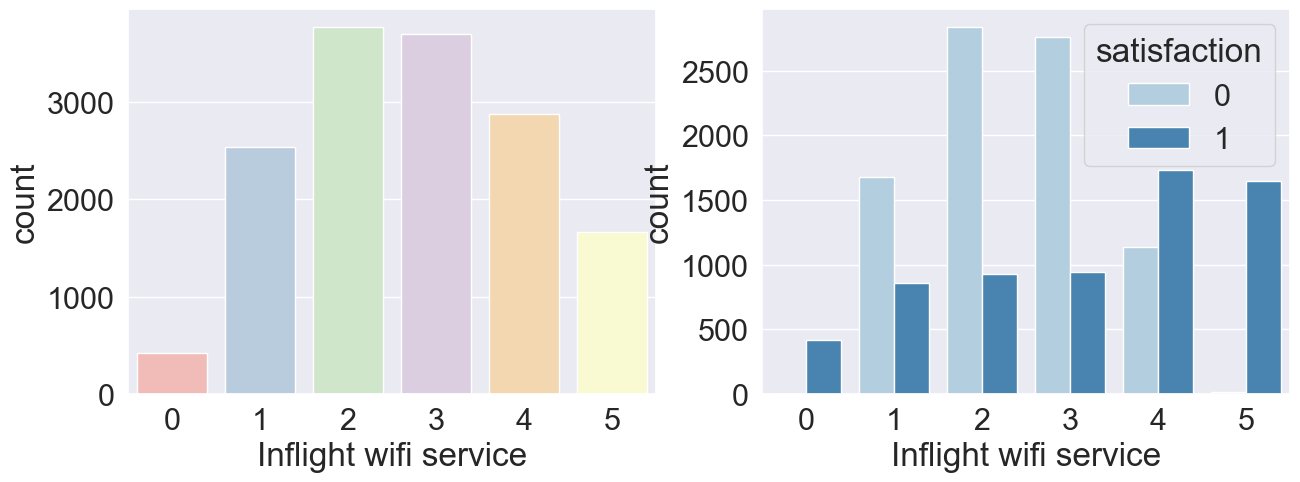

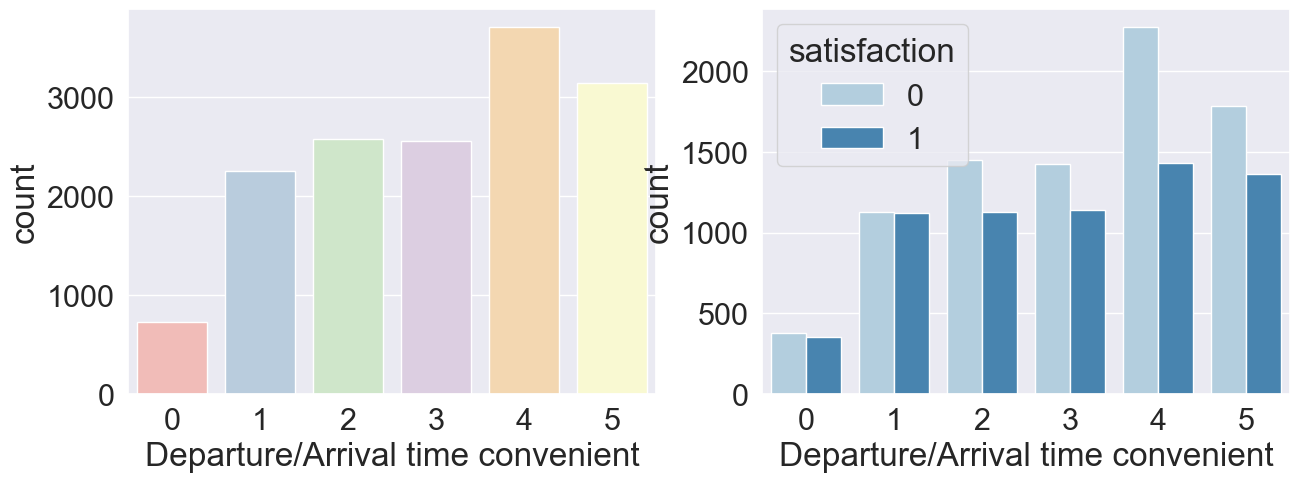

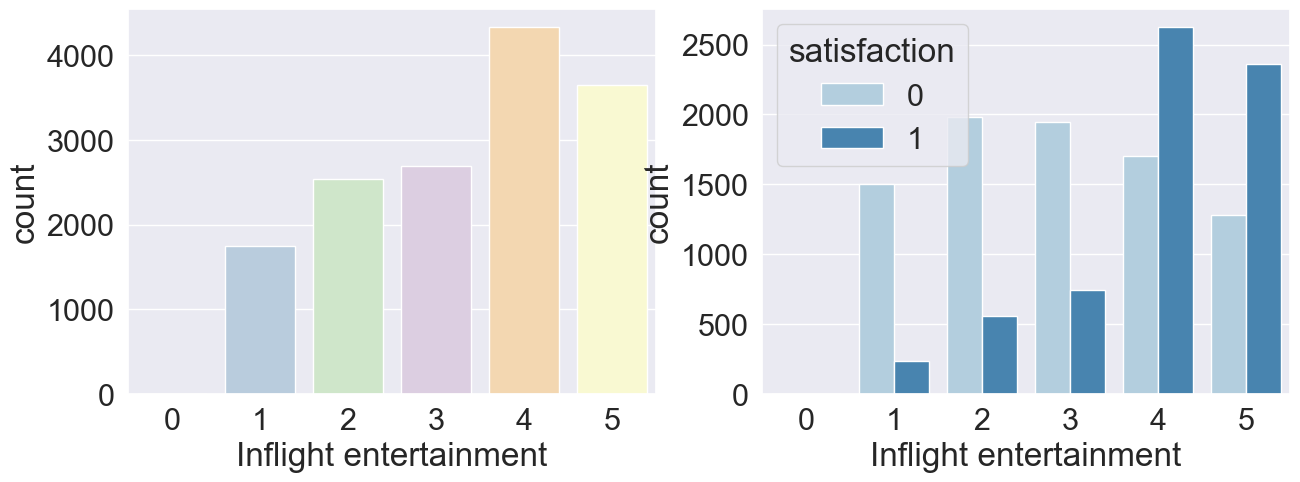

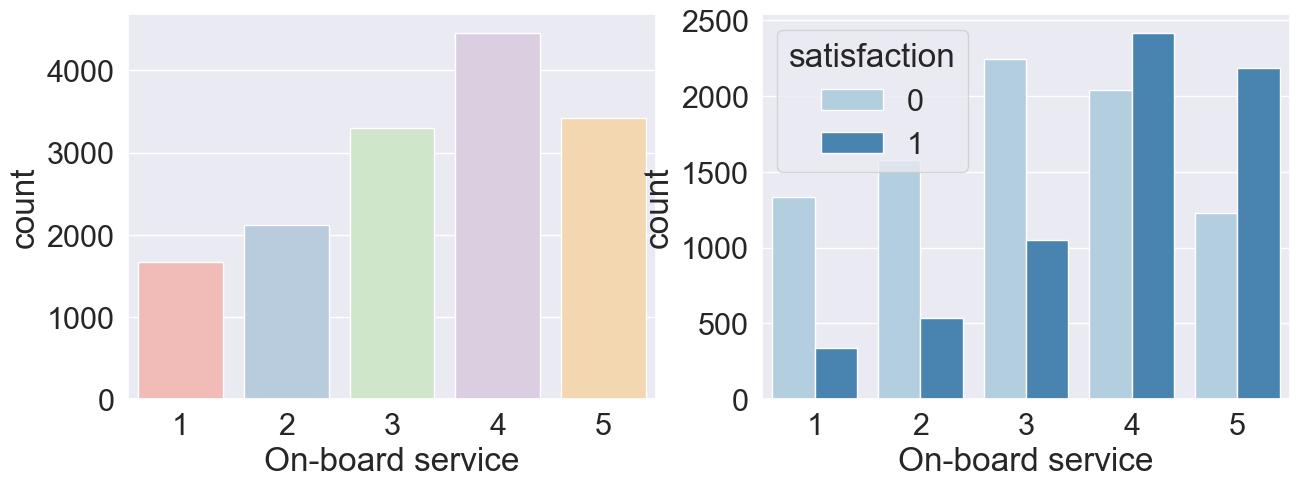

In [113]:
plot_func(0,4)

### 7. Customer Satisfaction variation with respect to Arrival/Departure Delay

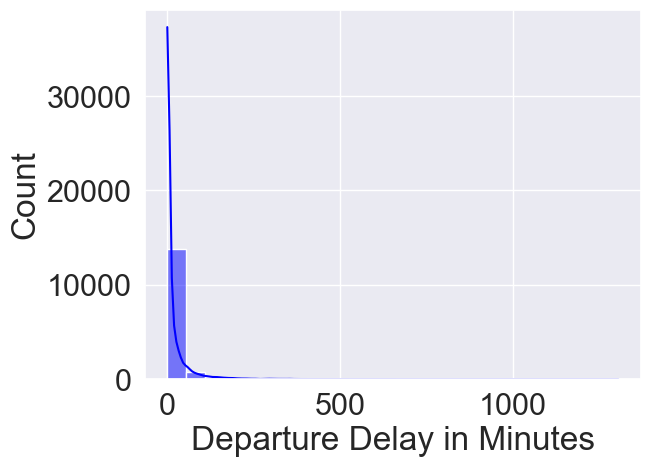

In [114]:
# 7.1 For Departure Delay
sns.histplot(raw_df["Departure Delay in Minutes"], bins=24,kde=True, color="blue");

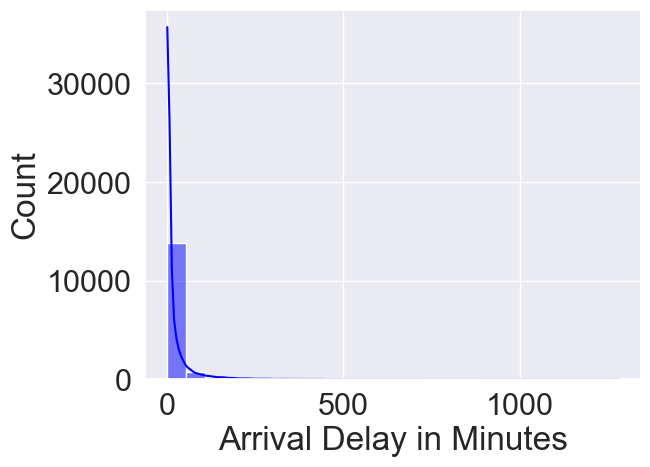

In [115]:
# 7.2 For Arrival Delay

sns.histplot(raw_df["Arrival Delay in Minutes"], bins=24,kde=True, color="blue");

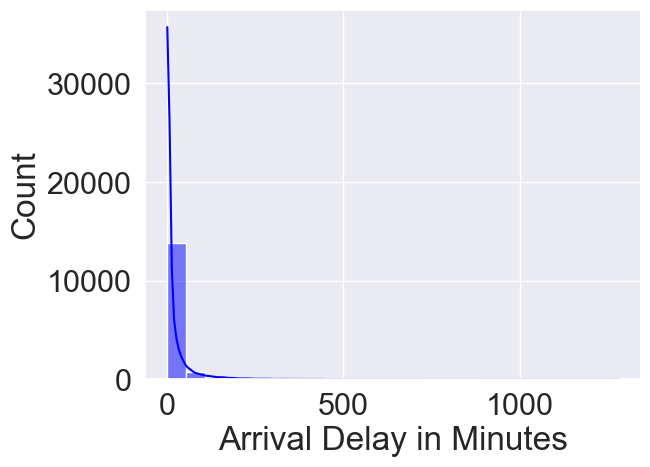

In [116]:

sns.histplot(raw_df["Arrival Delay in Minutes"], bins=24,kde=True, color="blue");

# 5 Training Model

In [117]:
#Splitting features and target
x= raw_df.drop(columns='satisfaction', axis =1)
y= raw_df['satisfaction']

In [118]:
print(x)

       Gender  Age  Class  Flight Distance  Inflight wifi service  \
77427       1   10      1              483                      3   
7510        0   35      0             2938                      1   
19585       1   59      0             2163                      3   
69780       1   39      0             3480                      3   
34846       1   37      1              469                      2   
...       ...  ...    ...              ...                    ...   
45093       1   34      0             2248                      3   
8304        0   46      1             1927                      2   
23025       1   26      1               67                      3   
63423       0   59      2              201                      2   
94472       0   35      0              387                      3   

       Departure/Arrival time convenient  Ease of Online booking  \
77427                                  4                       3   
7510                               

In [119]:
print(y)

77427    0
7510     1
19585    1
69780    1
34846    0
        ..
45093    1
8304     0
23025    0
63423    0
94472    1
Name: satisfaction, Length: 14956, dtype: int64


In [120]:
#Scaling data
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)
print(x)

[[ 0.99546362 -1.92243094  0.65487151 ...  1.30273205 -0.36054932
  -0.36420934]
 [-1.00455705 -0.2825626  -0.94759222 ... -0.22569788 -0.36054932
  -0.36420934]
 [ 0.99546362  1.291711   -0.94759222 ... -0.22569788 -0.21480681
  -0.36420934]
 ...
 [ 0.99546362 -0.8729152   0.65487151 ...  1.30273205 -0.36054932
  -0.36420934]
 [-1.00455705  1.291711    2.25733525 ... -1.75412781 -0.36054932
  -0.36420934]
 [-1.00455705 -0.2825626  -0.94759222 ... -0.98991284 -0.36054932
  -0.36420934]]


In [121]:
# diviing the data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [122]:
print(x.shape, x_train.shape,  x_test.shape)

(14956, 19) (11217, 19) (3739, 19)


In [123]:
print(y.shape, y_train.shape,  y_test.shape)

(14956,) (11217,) (3739,)


In [124]:
# Preparing dataframe to print the models and their respective accuracy
model_accuracy = pd.DataFrame(columns=['Model', 'Accuracy'])

# Random Forest

In [125]:
model= RandomForestClassifier()


In [126]:
#Utilize a training set to train model 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

In [155]:
#Utilizing testing set to test the model 
accuracy = model.score (x_test, y_test) 
print('Random Forest Classifier scores') 
print (f'Model accuracy\t\t: (acc)') 
print (f'Accuracy in Percentage\t: {"{:.1%}".format(accuracy)}') 
print(classification_report (y_test,y_pred))

Random Forest Classifier scores
Model accuracy		: (acc)
Accuracy in Percentage	: 94.0%
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2081
           1       0.95      0.91      0.93      1658

    accuracy                           0.94      3739
   macro avg       0.94      0.94      0.94      3739
weighted avg       0.94      0.94      0.94      3739



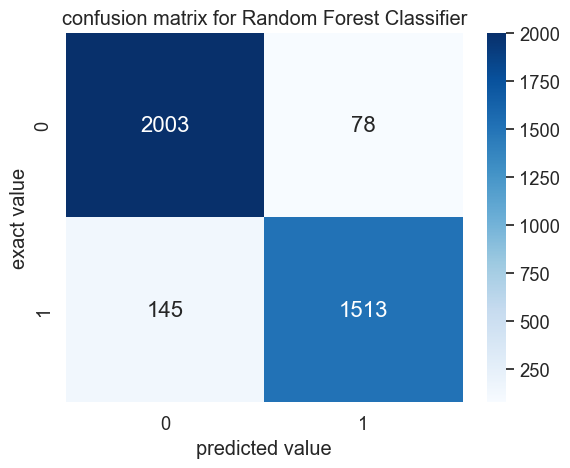

In [135]:
#confusion matrix for random forest
con_matrrix = confusion_matrix(y_test, y_pred)
#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) #Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap
#Add Labels and title.
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for Random Forest Classifier')
plt.show()

# Logistic Regression 

In [138]:
#Create a model using LogisticRegression 
LRmodel = LogisticRegression()
#Utilize a training set to train model 
LRmodel.fit(x_train, y_train) 
y_pred = model.predict(x_test)

In [153]:
#Utilizing testing set to test the model 
accuracy = LRmodel.score (x_test, y_test) 
print('Logistic Regression scores') 
print (f'Model accuracy\t\t: {accuracy}') 
print (f'Accuracy in Percentage\t: {"{:.1%}".format(accuracy)}')
print(classification_report(y_test, y_pred))

Logistic Regression scores
Model accuracy		: 0.8443434073281626
Accuracy in Percentage	: 84.4%
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2081
           1       0.95      0.91      0.93      1658

    accuracy                           0.94      3739
   macro avg       0.94      0.94      0.94      3739
weighted avg       0.94      0.94      0.94      3739



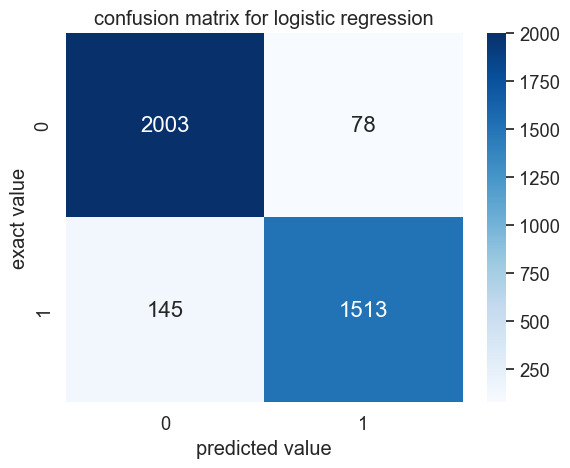

In [152]:
#confusion matrix for logistic regression 
con_matrrix = confusion_matrix(y_test, y_pred)
#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) #Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap
#Add Labels and title.
plt.xlabel('predicted value') 
plt.ylabel('exact value')
plt.title('confusion matrix for logistic regression')
plt.show()

# SVC 

In [158]:
#Creating model using SVC classifier
model= SVC()
#Utilize a training set to train model 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)
#Utilizing testing set to test the model 
accuracy = model.score (x_test, y_test) 
print('Random Forest Classifier scores') 
print (f'Model accuracy\t\t: (acc)') 
print (f'Accuracy in Percentage\t: {"{:.1%}".format(accuracy)}') 
print(classification_report (y_test,y_pred))

Random Forest Classifier scores
Model accuracy		: (acc)
Accuracy in Percentage	: 92.0%
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2081
           1       0.94      0.88      0.91      1658

    accuracy                           0.92      3739
   macro avg       0.92      0.92      0.92      3739
weighted avg       0.92      0.92      0.92      3739



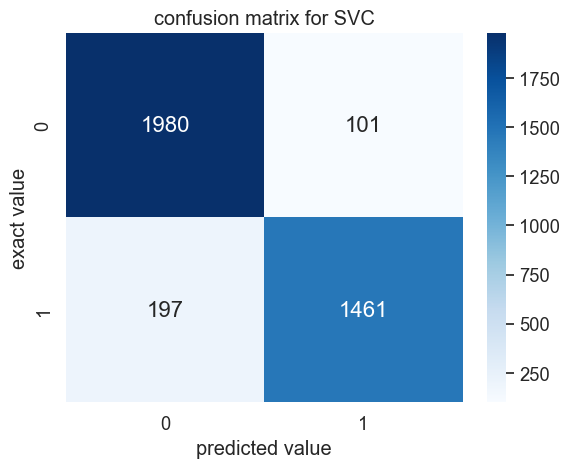

In [160]:
#confusion matrix for logistic regression 
con_matrrix = confusion_matrix(y_test, y_pred)
#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) #Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap
#Add Labels and title.
plt.xlabel('predicted value') 
plt.ylabel('exact value')
plt.title('confusion matrix for SVC')
plt.show()

# Decision Tree

In [161]:
#Creating model for Decision Tree
model= DecisionTreeClassifier()
#Utilize a training set to train model 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

In [162]:
#Utilizing testing set to test the model 
accuracy = model.score (x_test, y_test) 
print('Random Forest Classifier scores') 
print (f'Model accuracy\t\t: (acc)') 
print (f'Accuracy in Percentage\t: {"{:.1%}".format(accuracy)}') 
print(classification_report (y_test,y_pred))

Random Forest Classifier scores
Model accuracy		: (acc)
Accuracy in Percentage	: 91.8%
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2081
           1       0.91      0.91      0.91      1658

    accuracy                           0.92      3739
   macro avg       0.92      0.92      0.92      3739
weighted avg       0.92      0.92      0.92      3739



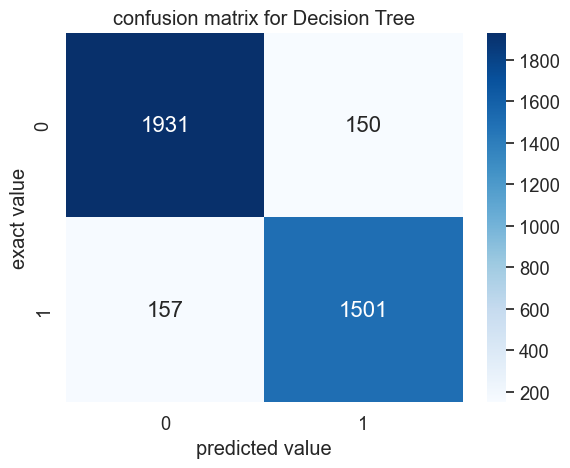

In [163]:
#confusion matrix for logistic regression 
con_matrrix = confusion_matrix(y_test, y_pred)
#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) #Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap
#Add Labels and title.
plt.xlabel('predicted value') 
plt.ylabel('exact value')
plt.title('confusion matrix for Decision Tree')
plt.show()

In [167]:
# Make a model list for checking the values
from xgboost import XGBClassifier
models = {"Logistic Regression": LogisticRegression(),
          "SVC" : SVC(),
          "KNN": KNeighborsClassifier(),
          "DecisionTree Classifier" : DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGB Classifier" : XGBClassifier()}

In [170]:
# Helper function to fit and score all the models.

def fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets):
    """
    Fits and evaluate the given machine learning model.
    models : Any Scikit-learn ML model
    train_inputs : Training Data (No Lables)
    val_inputs : Testing Data (No Lables)
    train_targets : Training Data (Lables)
    val_targets : Testing Data (Labels)
    """
    
    # Make a dictionary to keep the model score
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(train_inputs, train_targets)
        #Evaluate the model
        model_scores[name] = model.score(val_inputs, val_targets)
        
    return model_scores

In [172]:
%%time

# Train all models and saving their score
np.random.seed(42)
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test);

CPU times: total: 12 s
Wall time: 13.3 s


In [173]:
# Checking scores for different models

model_scores

{'Logistic Regression': 0.8443434073281626,
 'SVC': 0.9202995453329768,
 'KNN': 0.8943567798876705,
 'DecisionTree Classifier': 0.920032094142819,
 'Random Forest': 0.9374164215030757,
 'XGB Classifier': 0.9390211286440224}

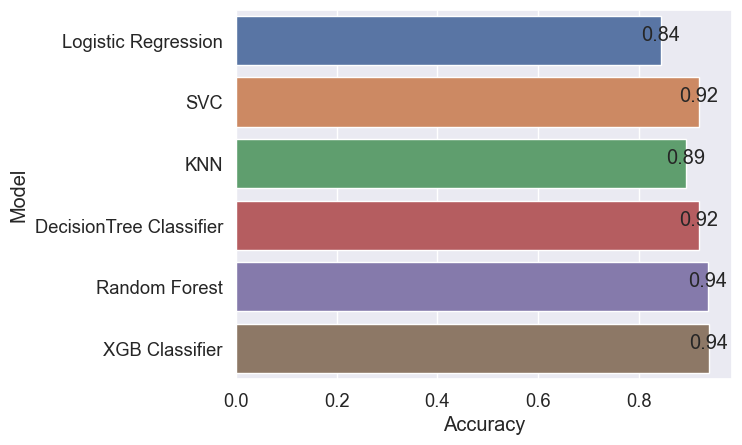

In [174]:
# Plotting bar graph out of the model scores
#model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
#sns.barplot(x=model_compare.T['Accuracy'], y=model_compare.T.index, orient="h")

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting bar graph out of the model scores
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

# Create a horizontal bar plot
ax = sns.barplot(x=model_compare.T['Accuracy'], y=model_compare.T.index, orient="h")

# Add values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha="center")

# Label the x and y axes
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Show the plot
plt.show()


# Putting all in one for prediction

In [183]:
input_data=(1,50,0,2643,4,4,4,4,4,4,5,5,5,5,4,5,5,0,0.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = LRmodel.predict(input_data_reshape)
if prediction == 1:
    print('Passenger satisfied!')
else:
    print('paassenger neutral or dissatisfied')

Passenger satisfied!


### 8.1 Summary

* Here in this machine learning project we tried to train a model which can predict if a custoer mis satisfied with the airline services or not based on the airline passenger satisfaction survey information.


* We trained eight different models but choose top three based on the validation scores:
    1. XG Boost Classification Model gave us 95.2 and 94.3 accuracy score with base and cross validated scoreline.
    2. Random Forest Classification Model gave us 95,1 and 94.1 accuracy score with base and cross validated scoreline.
    3. Decision Tree Classification Model gave us 92.6 and 92.3 accuracy score with base and cross validated scoreline.
    
    
* As we got more than 90% correct values on prediction, we can use it for deployment. For extra boose we can take average of top three models and make an ensembled scores.


* Infomration we found through Exploratory Data Analysis:
    1. we found out that majority of the passengers are unsatisfied/neutral with the airline services. Thats a huge concern for the airline and they needs to upgrade their values and services.
    2. Majority of the loyal passengers are unsatisfied/neutral with the airline services, they also needs to give extra attention to this category.
    3. Majority of Business Travel passengers are satisfied similirly majorlity of Personal Travel passengers seems  unsatisfied.
    4. Majority of Eco and Eco Plus Class passengers seems unsatisfied/neutral with the services.
    5. Most of the columns with passenger inputs shows positive correlation with the satisfation level.
    

* Infomration we found through ML Model Evaluation:
    1. Although all modesl shows different feature impotances few are common in all : Online Boarding, Type of Travel, Inflight Wifi Services, Type of Class and Inflight Entertainment.
    2. Although all modesl shows different permutation impotances few are common in all : Inflihght Wifi Services, Online Boarding, Type of Travel, Customer Type and Baggage Handling.